<a href="https://colab.research.google.com/github/sundarjhu/AstrostatsIRyA2023/blob/main/Statistics_For_Astronomers_20230823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt

#### Let's start with three sets of observations, $X_1, X_2,$ and $X_3$, each with a sample size of $N=10$.

In [5]:
N = 10
x1 = uniform.rvs(size=N)
x2 = uniform.rvs(size=N)
x3 = uniform.rvs(size=N)

#### We will compute the sample mean for each set of observations

In [6]:
xbar1 = x1.mean()
xbar2 = x2.mean()
xbar3 = x3.mean()

#### Let's compare the distribution of the one sets of observations to the distribution of the means

#### The mean distribution has a narrower spread

(0.0, 1.0)

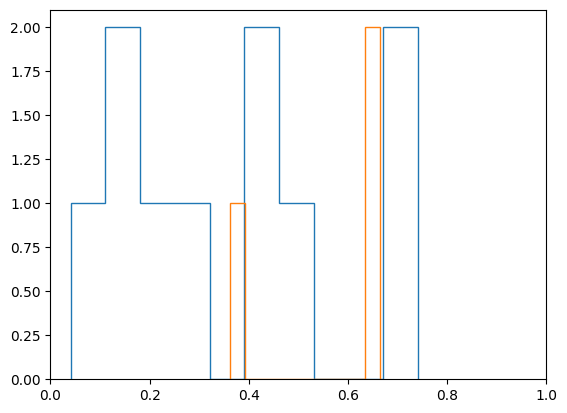

In [7]:
plt.hist(x1, histtype='step')
plt.hist([xbar1, xbar2, xbar3], histtype='step')
plt.xlim(0, 1)

#### To simplify the computation, we will now generate $N_{\\rm obs}$ observations with $N_{\\rm points}$ each.

#### We will exploit numpy's vectorisability by drawing the random values into a $N_{\rm obs}\times N_{\rm points}$ matrix instead of individually into $N_{\rm obs}$ arrays.

In [10]:
Npoints = 5
Nobs = 10
x = uniform.rvs(size=(Npoints, Nobs)) # this is a Npoints x Nobs matrix
xbar = x.mean(axis=0) # this is a Nobs-element array
print(x.shape, xbar.shape)

(5, 10) (10,)


#### Let's compare the sample standard deviations of the first set of observations with those of the sample means
#### The ddof=1 setting will be explained later!

In [12]:
print(x[:, 0].std(ddof=1))
print(xbar.std(ddof=1))
print(xbar.std(ddof=1) * np.sqrt(Nobs))

0.3153925779771879
0.12835664841099756
0.40589936180418473


#### Let's compare the distributions again.

#### Note that this time density=True, so the y axis shows the PDF rather than the counts.

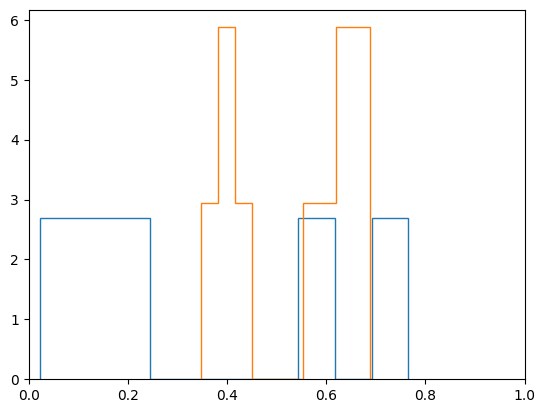

In [13]:
_ = plt.hist(x[:, 0], histtype='step', density=True)
_ = plt.hist(xbar, histtype='step', density=True)
_ = plt.xlim(0, 1)

#### Put it all together. For less noisy histograms, we will keep $N_{\rm obs}$ fixed at 40.






In [14]:
def doall(Npoints=10, Nobs=40):
  x = uniform.rvs(size=(Npoints, Nobs)) # this is a Npoints x Nobs matrix
  xbar = x.mean(axis=0) # this is a Nobs-element array
  print("Shapes of X and Xbar arrays: ", x.shape, xbar.shape)
  print("Sample std dev of first X array: ", x[:, 0].std(ddof=1))
  print("Sample std dev of Xbar array: ", xbar.std(ddof=1))
  # print(xbar.std(ddof=1) * np.sqrt(Nsamples))
  _ = plt.hist(x[:, 0], histtype='step', density=True, color='black')
  counts = plt.hist(xbar, histtype='step', density=True, color='red')
  ymax = max(counts[0])
  plt.plot([x[:, 0].mean(), x[:, 0].mean()], [0, 1.2 * ymax], '--', label = 'sample mean')
  plt.plot([xbar.mean(), xbar.mean()], [0, 1.2 * ymax], '--', label = 'sample mean of sample means')
  plt.legend(loc='best')
  _ = plt.xlim(0, 1)
  _ = plt.ylim(0, 1.2 * ymax)


#### First, keep everything fixed and run it a few times to see how the mean of each observation varies significantly while the mean of the sample means basically stays at the same place

Shapes of X and Xbar arrays:  (10, 40) (40,)
Sample std dev of first X array:  0.29282262706769596
Sample std dev of Xbar array:  0.08301891206856506


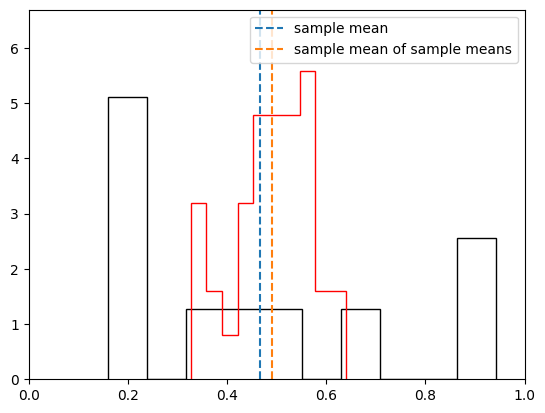

In [19]:
# Execute this cell a few times
doall()

#### Now, vary $N_{\rm points}$ to see how the results change.
#### Note, in particular, two things as $N_{\rm points}$ increases:
> 1. The standard deviation of the mean decreases approximately proportional to $1/\sqrt{N_{\rm points}}$
> 2. The density distribution of the mean becomes more peaked

Shapes of X and Xbar arrays:  (10, 40) (40,)
Sample std dev of first X array:  0.39187916422831026
Sample std dev of Xbar array:  0.08931835432714633


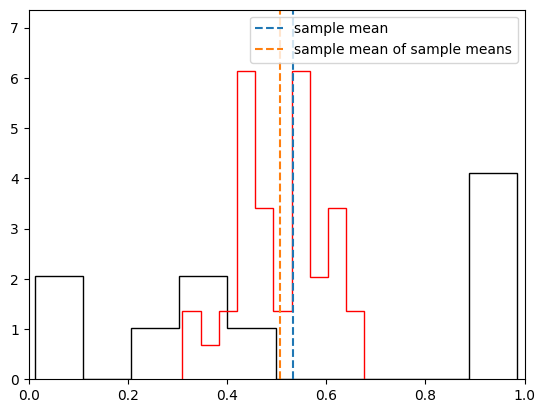

In [20]:
doall(Npoints=10)

Shapes of X and Xbar arrays:  (40, 40) (40,)
Sample std dev of first X array:  0.3147192685076517
Sample std dev of Xbar array:  0.04068488761277569


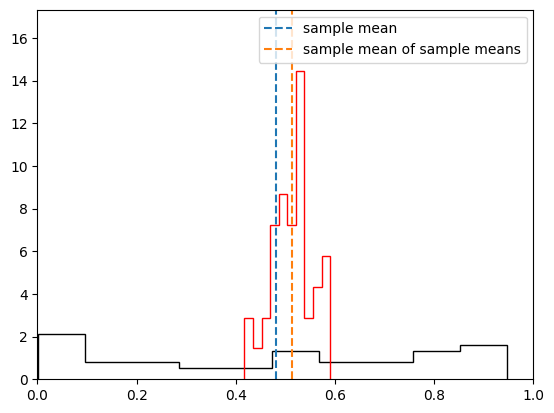

In [21]:
doall(Npoints=40) # sqrt(Npoints) increased by a factor of 2

Shapes of X and Xbar arrays:  (160, 40) (40,)
Sample std dev of first X array:  0.2909626412001646
Sample std dev of Xbar array:  0.024364479335800698


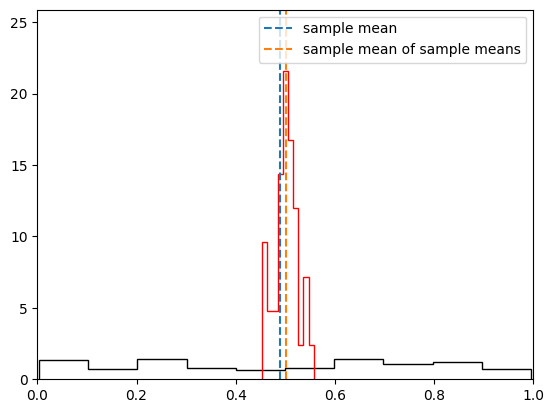

In [22]:
doall(Npoints=160) # sqrt(Npoints) again increased by a factor of 2